In [ ]:
library(tidyverse)
library(lubridate)
library(CausalImpact)
#install.packages("CausalImpact")
library(CausalImpact)

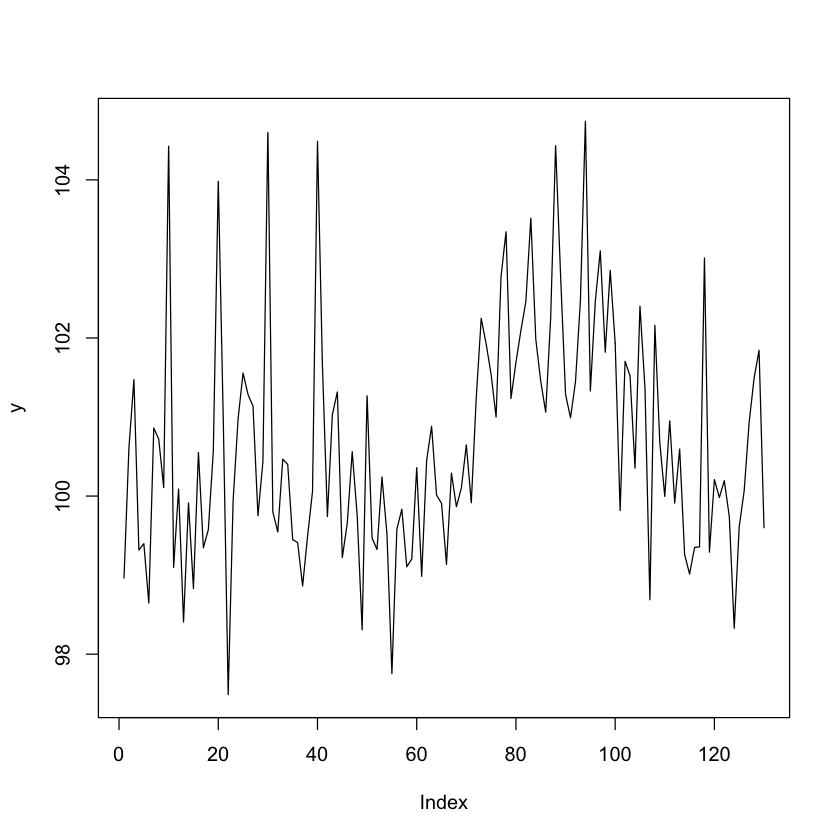

In [90]:
set.seed(400)
x1 <- 100 #+ arima.sim(model = list(ar = 0.0001), n = 150)
y <-x1 + rnorm(130)
x2<-rep(0,130)
x2[c(10,20,30,40)]<-1
y[71:100] <- y[71:100] + 2 #71:100 까지 +1 intervension effect
y[101:130] <- y[101:130] + 0 #121:150  +0
y[which(x2==1)]<-y[which(x2==1)]+5
data <- cbind(y, x2)


#matplot(data, type = "l")
plot(y,type='l')

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   102            3063        
Prediction (s.d.)        100 (0.19)     2997 (5.75) 
95% CI                   [100, 100]     [2986, 3009]
                                                    
Absolute effect (s.d.)   2.2 (0.19)     66.0 (5.75) 
95% CI                   [1.8, 2.6]     [54.2, 76.9]
                                                    
Relative effect (s.d.)   2.2% (0.19%)   2.2% (0.19%)
95% CI                   [1.8%, 2.6%]   [1.8%, 2.6%]

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.89909%

For more details, type: summary(impact, "report")



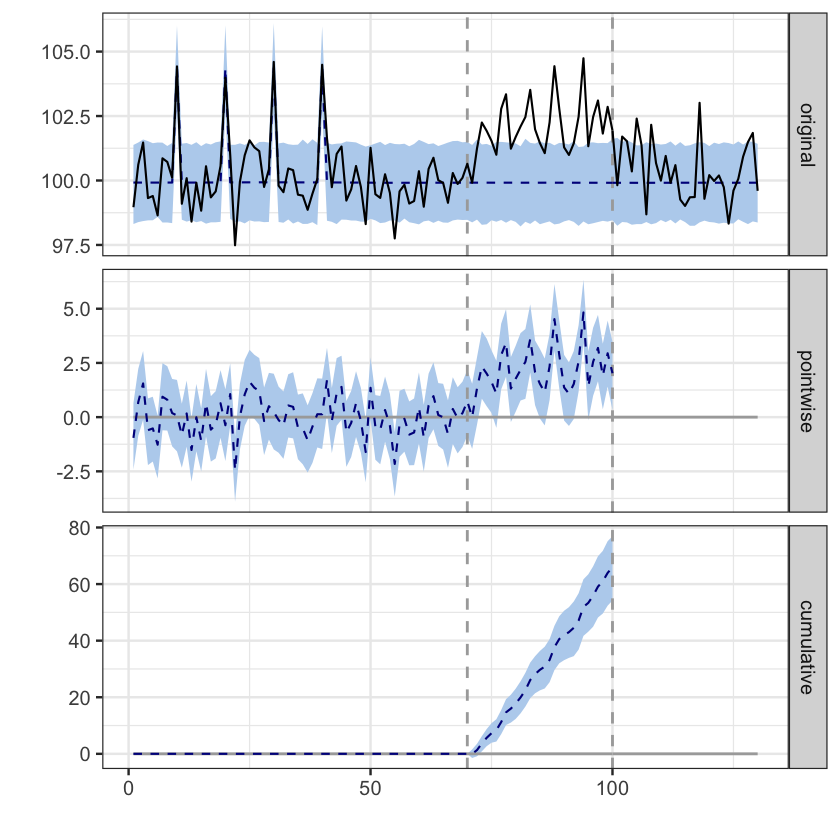

In [91]:
pre.period <- c(1, 70)
post.period <- c(71, 100)

impact <- CausalImpact(data, pre.period, post.period) #평균 모형 적합
plot(impact)
summary(impact)


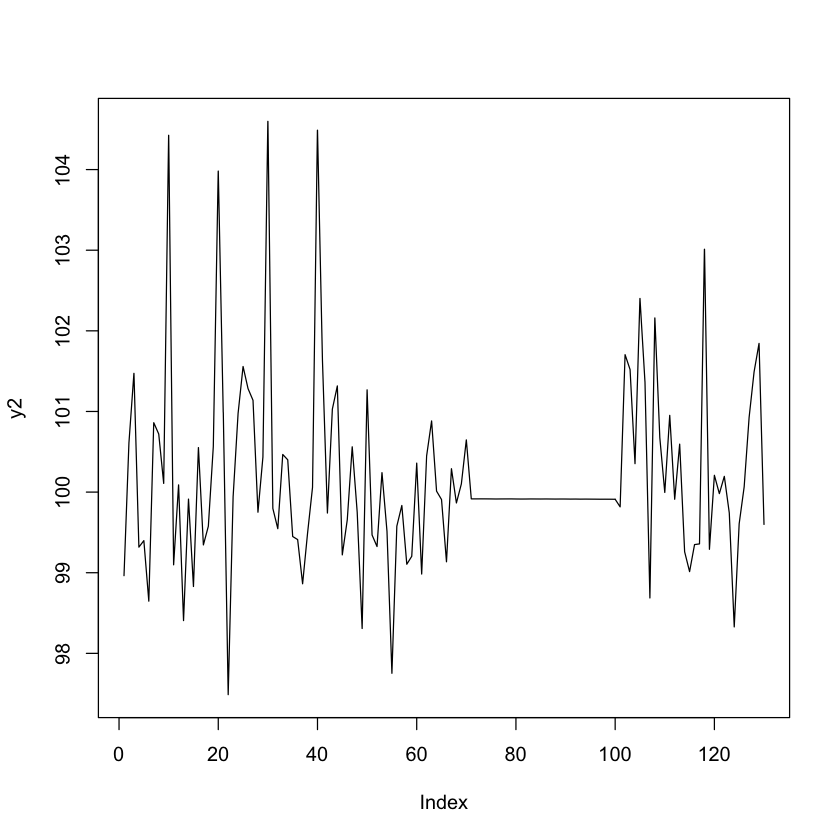

Posterior inference {CausalImpact}

                         Average          Cumulative    
Actual                   100              3011          
Prediction (s.d.)        100 (0.057)      2999 (1.697)  
95% CI                   [100, 100]       [2995, 3002]  
                                                        
Absolute effect (s.d.)   0.43 (0.057)     12.88 (1.697) 
95% CI                   [0.32, 0.54]     [9.52, 16.31] 
                                                        
Relative effect (s.d.)   0.43% (0.057%)   0.43% (0.057%)
95% CI                   [0.32%, 0.54%]   [0.32%, 0.54%]

Posterior tail-area probability p:   0.00103
Posterior prob. of a causal effect:  99.89712%

For more details, type: summary(impact, "report")



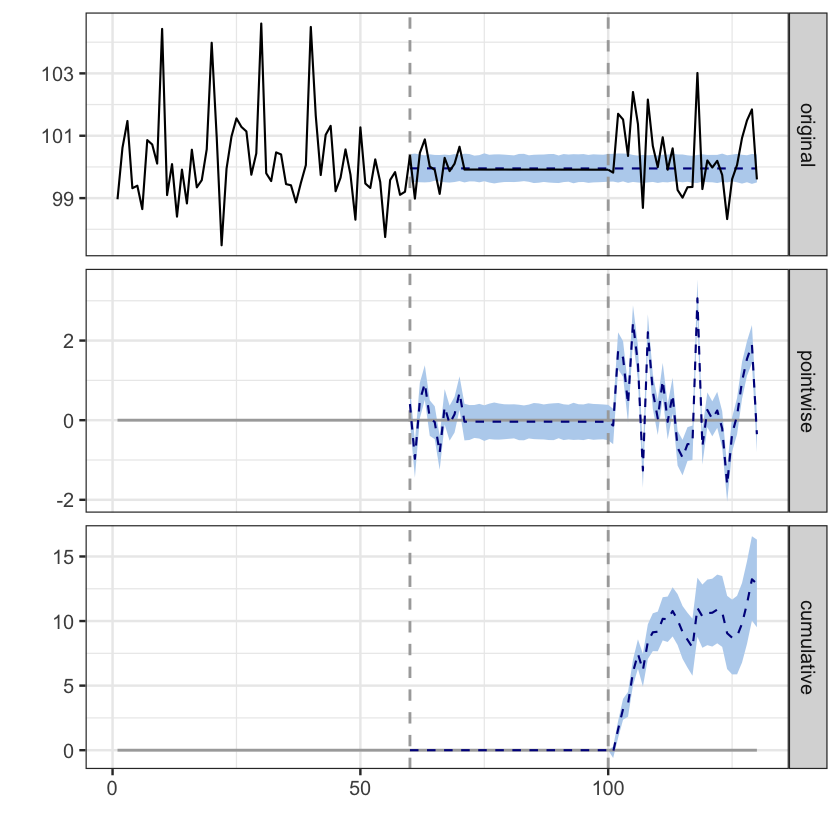

In [92]:
pre.period <- c(60, 100)
post.period <- c(101, 130)
y2<-y
y2[71:100]<-impact$series[,3][71:100] #예측값 대입
data2 <- cbind(y2, x2)
#matplot(data2, type = "l")
plot(y2,type='l')
impact <- CausalImpact(data2, pre.period, post.period)
plot(impact)
summary(impact)

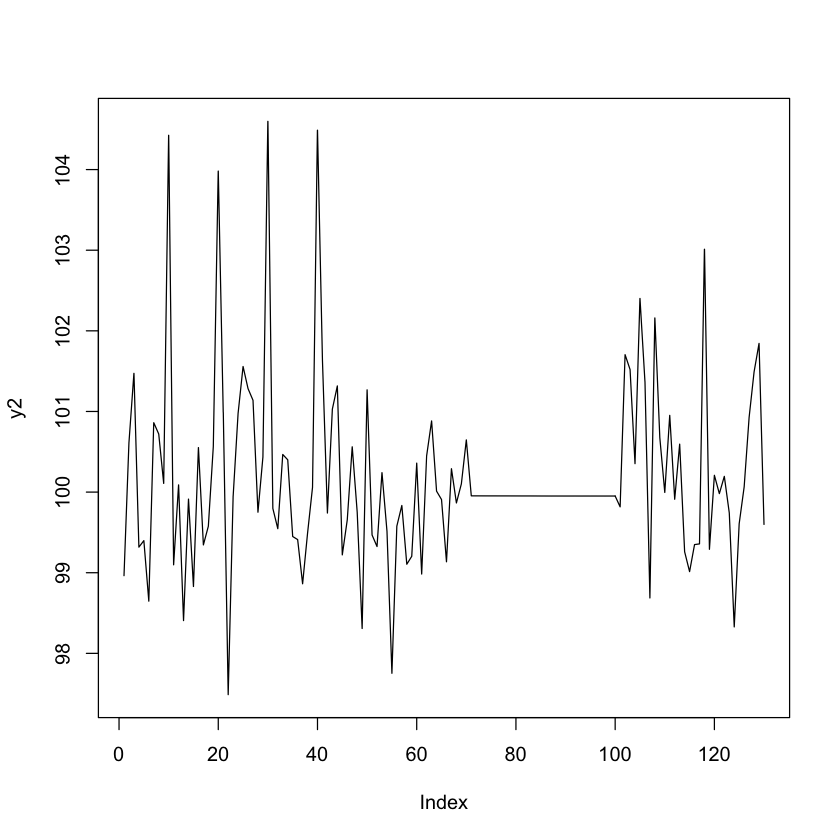

Posterior inference {CausalImpact}

                         Average          Cumulative    
Actual                   100              3011          
Prediction (s.d.)        100 (0.15)       2998 (4.54)   
95% CI                   [100, 100]       [2989, 3007]  
                                                        
Absolute effect (s.d.)   0.45 (0.15)      13.54 (4.54)  
95% CI                   [0.15, 0.75]     [4.52, 22.42] 
                                                        
Relative effect (s.d.)   0.45% (0.15%)    0.45% (0.15%) 
95% CI                   [0.15%, 0.75%]   [0.15%, 0.75%]

Posterior tail-area probability p:   0.00237
Posterior prob. of a causal effect:  99.76331%

For more details, type: summary(impact, "report")



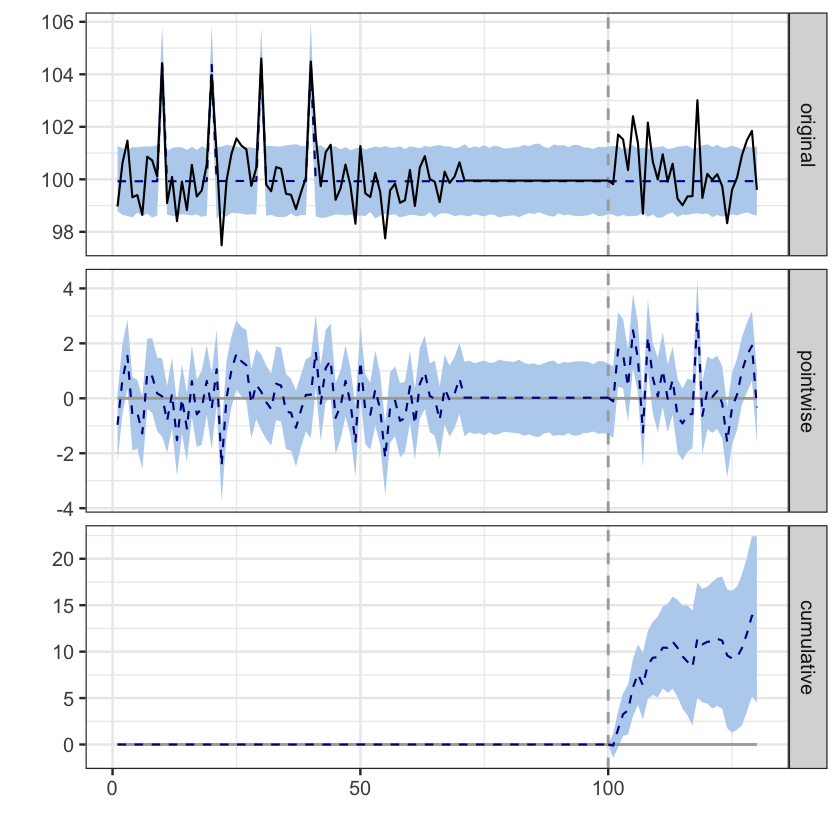

In [93]:
pre.period <- c(1, 100)
post.period <- c(101, 130)
y2<-y
y2[71:100]<-impact$series[,3][71:100] #예측값 대입
data2 <- cbind(y2, x2)
#matplot(data2, type = "l")
plot(y2,type='l')
impact <- CausalImpact(data2, pre.period, post.period)
plot(impact)
summary(impact)